## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  


输入: 120
预测结果是: 350.89990059139694


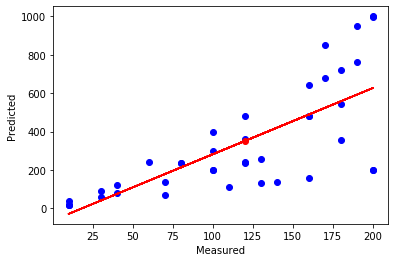

In [13]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import random
import numpy as np

lr = linear_model.LinearRegression()


def assuming_function(x):
    return random.randint(1, 5) * x + random.randint(-2, 2)


def generate_data():
    X = np.random.random_integers(low=1, high=20, size=(40, 1)) * 10
    y = [assuming_function(x) for x in X]
    y = np.array(y)
    return X, y


def f(x, k, b):
    return k * x + b


def predict(x):
    X, y = generate_data()
    reg = lr.fit(X, y)
    reg.score(X.reshape(-1, 1), y)
    p = lr.predict(np.array([x]).reshape(1, -1))
    return X, y, p, reg.coef_, reg.intercept_


def draw_graph(x):
    X, y, predicted, k, b = predict(x)
    print('输入: ' + str(x) + "\n预测结果是: " + str(predicted[0][0]))
    fig, ax = plt.subplots()
    ax.scatter(X, y, c='b')
    ax.plot(X, f(X, k, b), color='red')
    ax.scatter(x, predicted, c='r')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


def result(x):
    draw_graph(x)
    return


result(120)

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

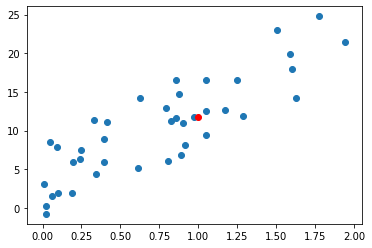

In [14]:
# you code here
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cosine


def assuming_function(x):
    return 10 * x + 3 + random.randint(-5, 5)


# 1. 将数据存到内存中
def knn_model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]


# 2. 计算各点与预测点的余弦相似度
# 源码中的余弦相似度的计算为啥是1-cos(theta)
def distance(x1, x2):
    c = cosine(x1, x2)
    return c


def draw_graph(x, y):
    plt.scatter(x, y, c='r')
    plt.show()
    return


def result(x, k=3):
    X, Y = generate_training_data()
    most_similar_datas = sorted(knn_model(X, Y), key=lambda xi: distance(xi[0], x))
    y_hats = [_y for x, _y in most_similar_datas[:k]]
    predicted = np.mean(y_hats)
    draw_graph(x, predicted)
    return


def generate_training_data():
    random_data = np.random.random((40, 2))
    X = random_data[:, 0] * 2
    Y = [assuming_function(x) for x in X]
    plt.scatter(X, Y)
    return X, Y


result(1)

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [7]:
# you code here
from collections import Counter
# from icecream import ic
import numpy as np
import pandas as pd

mock_data = {
    'gender': ['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 2, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}


# 根据训练数据，生成决策树的模型
def decision_tree_model(training_data: pd.DataFrame, target: str):
    feature_tree = {}
    features = []
    while True:
        # print(training_data)
        # print(training_data.shape)
        f, v = find_the_optimal_spilter(training_data, target)
        if f is None:
            break
        training_data = training_data[training_data[f] != v]
        features.append(f)
        feature_tree[f] = v
        training_data = training_data.drop(columns=[f])
        if training_data.empty:
            break
    return features, feature_tree


dataset = pd.DataFrame.from_dict(mock_data)


def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return -sum(p * np.log(p) for p in probs)


# 返回特征和信息熵
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
        # ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
#             ic(sub_spliter_1)
            # split by the current feature and one value

            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)

            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            # ic(sub_spliter_2)

            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)

            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)

            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)

    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter


feature_names, feature_values = decision_tree_model(dataset, 'bought')
print("需依次判断的特征为: ", feature_names)
print("各个特征判断为True的值： ", feature_values)

spliter is: ('family_number', 2)
the min entropy is: 0.5623351446188083
spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083
需依次判断的特征为:  ['family_number', 'income']
各个特征判断为True的值：  {'family_number': 2, 'income': '+10'}


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

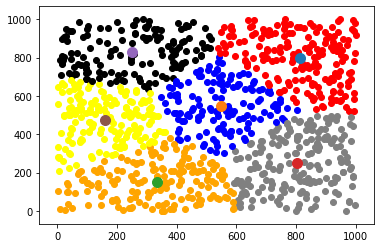

In [8]:
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from sklearn.cluster import KMeans


# 生成2-D待分类数据
def generate_clustering_data():
    X1 = [random.randint(0, 1000) for _ in range(0, 1000)]
    X2 = [random.randint(0, 1000) for _ in range(0, 1000)]
    return [[x1, x2] for x1, x2 in zip(X1, X2)]


def clustering(data):
    return KMeans(n_clusters=6, max_iter=1000).fit(data)


def draw_graph(cluster, locations):
    clustered_locations = defaultdict(list)
    colors = ['red', 'blue', 'orange', 'grey', 'black', 'yellow']
    # 数据所属分类和颜色标记可以在一个for循环内完成，不必像课程代码中一样分开。
    for label, location in zip(cluster.labels_, locations):
        clustered_locations[label].append(location)
        plt.scatter(*location, c=colors[label])
    # 标记聚类中心点的颜色，这里颜色不设定，其会自动随机选择颜色，不会撞色
    for center in cluster.cluster_centers_:
        plt.scatter(*center, s=100)
    plt.show()
    return


# 1. 生成待分类数据
clustering_data = generate_clustering_data()
# 2. 待分类数据的模型
cluster = clustering(clustering_data)
# 3. 绘制聚类数据图
draw_graph(cluster, clustering_data)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

1) In different subjects, model has different meaning. it can be pysical or abstract. But in computer science, we usually use model that is a simplified representation to describe the working of the real world system.

2) "All models are wrong" that is, every model is wrong because it is a simplification of reality. Some models, especially in the "hard" sciences, are only a little wrong. They ignore things like friction or the gravitational effect of tiny bodies. Other models are a lot wrong - they ignore bigger things. In the social sciences, we ignore a lot.

"But some are useful" - simplifications of reality can be quite useful. They can help us explain, predict and understand the universe and all its various components.

This isn't just true in statistics! Maps are a type of model; they are wrong. But good maps are very useful. Examples of other useful but wrong models abound.

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

1) underfiting is that use complex formula matchs some simple data for high accuration.
a) An underfitted model results in problematic or erroneous outcomes on new data
b) data that it wasn't trained on, and often performs poorly even on training data.

2) On the contrary, overfiting is that use a simple function to resprenst the data with high inaccuracy. Overfiting can't be avoided, but can be relieved.
a) model selection is not right. A overfiting model such as decision tree, CNN is used in some simple applications.
b) sample method from taining data is not right or training data contains much noise data.
c) there are many parameters to tune. so the complexity of the model is high. 

something else.


#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

1) Precision: the proportion of positive identifications was actually correct. 
<center>P = $\frac{TP}{ TP + FP}$</center>
2) Recall: the proportion of actual positives was identified correctly.
<center>R = $\frac{TP}{ TP + FN}$</center> 
3) AUC: that is Area Under ROC Curve.  AUC measures the entire two-dimensional area underneath the entire ROC curve.  
    An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 
    
4) F1/F2 score: the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score. The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
 <center> F<sub>1</sub>  =2 * $ \frac{P * R}{P + R} $ </center>
 
 There is also a more general represent,it's like this:
  <center> F<sub>$\beta$</sub>  =$ \frac{(1 +\beta^2) x P x R }{\beta^2 x P + R} $ </center>
 when $\beta$ = 1, that is F1 score. when $\beta$ = 2, that is F2 score. 
 

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）  
In my opinion, ML is more depended on statistical method. We improve ourself by reading books or self experiece etc. It's same as computer.The differece is that computer learn from the history data. Therse is an advantage of using ML in dealing with the unstructure data such as vedio and audio. For now, more and more data which contain much valuable information are produced everyday. But there are some limits for the tranditional programming in how to develop and use these data. For the tranditional programming, it's easy to handle structured data which has obvious features. But for unstructured data, it's difficut to find some apparent features. ML is capable of capturing some potential information from various data. It's provide a easy way for us to extract valuable data.  

It is no doubt that there is no a absolutely model which is suitable all scenarios. We have to select a model accoding to the scenario. And then train an available model with provided data. ML application is based on the real world. It can be used to improve our efficiency. But it is also not available for everthing. In some case, tranditional programming maybe more suitable.

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.  
This descriotion is right. If knew the evaluation, we also konw what we want to need. If the evalution defined not right, we may get a model which is not we wanted. For example, if a model selected or trained with a high precision and low recall, it may very complex and even get error result with overfitting. On the contray, if we trained with hign recall and ignored the prcision, then we may also got a result not we wanted. At the same time, it may spend a lot of time to tarin the model becasue we have to iterate many times for the high precision or recall. So we should define the model correctly. It's not worrth to achieve an unilaterally high evalution. After all, our target is to get an useable model.So we may define evalution correctly. On this condition, we can train the model easier.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [10]:
# you code here
from collections import Counter
# from icecream import ic
import numpy as np
import pandas as pd

mock_data = {
    'gender': ['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 2, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}


# 根据训练数据，生成决策树的模型
def decision_tree_model(training_data: pd.DataFrame, target: str):
    feature_tree = {}
    features = []
    while True:
        # print(training_data)
        # print(training_data.shape)
        f, v = find_the_optimal_spilter(training_data, target)
        if f is None:
            break
        training_data = training_data[training_data[f] != v]
        features.append(f)
        feature_tree[f] = v
        training_data = training_data.drop(columns=[f])
        if training_data.empty:
            break
    return features, feature_tree


dataset = pd.DataFrame.from_dict(mock_data)


def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return -sum(p * np.log(p) for p in probs)


# 返回特征和信息熵
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
        # ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
#             ic(sub_spliter_1)
            # split by the current feature and one value

            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)

            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            # ic(sub_spliter_2)

            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)

            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)

            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)

    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter


def predicate(input_feature_values, target: str):
    feature_names, feature_values = decision_tree_model(dataset, target)
    print("需依次判断的特征为: ", feature_names)
    print("各个特征判断为True的值： ", feature_values)
    columns = dataset.columns.values.tolist()
    need_judge = {}
    for index, v in enumerate(input_feature_values):
        need_judge[columns[index]] = v
    print("待判断的各个特征的值: ", need_judge)
    for f in feature_names:
        if need_judge[f] == feature_values[f]:
            return True
    return False


result = predicate(["M", "-10", 1], target='bought')
print("\n判断的结果为: ", result)

spliter is: ('family_number', 2)
the min entropy is: 0.5623351446188083
spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083
需依次判断的特征为:  ['family_number', 'income']
各个特征判断为True的值：  {'family_number': 2, 'income': '+10'}
待判断的各个特征的值:  {'gender': 'M', 'income': '-10', 'family_number': 1}

判断的结果为:  False


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

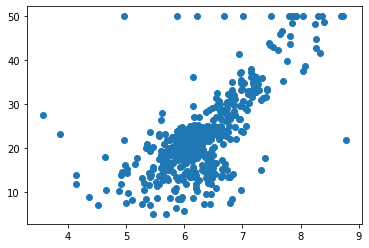

Iteration 0, the loss is 101.79439981654579, parameters k is 2.390391413014868 and b is -94.28432956589883
Iteration 100, the loss is 61.29777043386082, parameters k is 8.675025800366651 and b is -93.28432956589832
Iteration 200, the loss is 20.98489765232, parameters k is 14.945653310248137 and b is -92.28602917064106
Iteration 300, the loss is 6.291425069010592, parameters k is 18.066864851750115 and b is -91.75429004020626
Iteration 400, the loss is 6.284935464998442, parameters k is 18.088206235149272 and b is -91.68930980305227
Iteration 500, the loss is 6.28122401185513, parameters k is 18.079350503923873 and b is -91.62903312321035
Iteration 600, the loss is 6.277512558711827, parameters k is 18.070494772698474 and b is -91.56875644336843
Iteration 700, the loss is 6.273801105568516, parameters k is 18.061639041473075 and b is -91.50847976352651
Iteration 800, the loss is 6.270089652425212, parameters k is 18.052783310247676 and b is -91.44820308368459
Iteration 900, the loss is

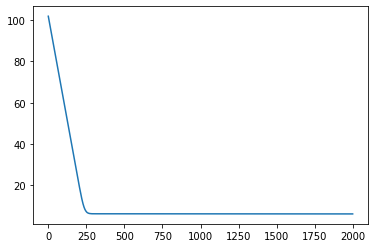

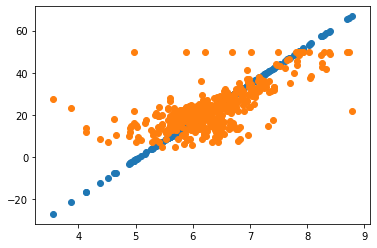

In [12]:
# you code here
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

dataset = load_boston()
x, y = dataset['data'], dataset['target']
X_rm = x[:, 5]
plt.scatter(X_rm, y)
plt.show()


# Gradient descent

def price(rm, k, b):
    return k * rm + b


def loss(y, y_hat):
    # return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))
    # loss 定义为绝对值
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


# define partial derivative
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i >= y_hat_i:
            gradient += (-x_i)
        else:
            gradient += x_i
    return gradient / n


def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return gradient / n


def train():
    # initialized parameters
    k = random.random() * 200 - 100  # -100 100
    b = random.random() * 200 - 100  # -100 100

    learning_rate = 1e-2

    iteration_num = 2000
    losses = []
    for i in range(iteration_num):
        price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
        current_loss = loss(y, price_use_current_parameters)
        losses.append(current_loss)
        if i % 100 == 0:
            print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i, current_loss, k, b))

        k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
        b_gradient = partial_derivative_b(y, price_use_current_parameters)

        k = k + (-1 * k_gradient) * learning_rate
        b = b + (-1 * b_gradient) * learning_rate
    plt.plot(list(range(iteration_num)), losses)
    plt.show()
    return k, b


best_k, best_b = train()
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.scatter(X_rm, price_use_best_parameters)
plt.scatter(X_rm, y)
plt.show()

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)